In [109]:
import multiprocessing.pool
from datetime import datetime
import pandas as pd
import os
import numpy as np
from functools import partial
import dask.dataframe as dd
import dask.multiprocessing
LOB = pd.DataFrame()
import datetime
import os
import dask.dataframe as dd
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
# laCie = '/media/ak/LaCie/'
data1 = '/media/ak/Data2/'
# trades_quotes_folder = os.path.join(data1, 'Trades and Quotes Purchased July 2020/')
trades_quotes_folder = os.path.join(data1, 'TradesPurchased/tmp')
symbol = 'CLJ'
symbol_folders = [f for f in os.listdir(trades_quotes_folder) if str(symbol) in f]
### 
symbol_futures_2020_folder = [f for f in symbol_folders if str('2020') in f]

In [27]:
symbol_futures_2020_folder

['CLJ2020_quotes', 'CLJ2020_trades']

In [23]:
quotes_folder = os.path.join(trades_quotes_folder, symbol_futures_2020_folder[0])
quotes_dates = [f.split(".")[0] for f in os.listdir(quotes_folder) ]
trades_folder = os.path.join(trades_quotes_folder, symbol_futures_2020_folder[1])
trades_dates = [f.split(".")[0] for f in os.listdir(trades_folder) ]


In [25]:
common_dates = list(set(quotes_dates) & set(trades_dates))

In [28]:
quote_file = os.path.join(trades_quotes_folder,symbol_futures_2020_folder[0], common_dates[0]+'.csv')
trade_file = os.path.join(trades_quotes_folder,symbol_futures_2020_folder[1], common_dates[0]+'.csv')


In [47]:
trades = pd.read_csv(trade_file, index_col=[0],infer_datetime_format=True)
quotes = pd.read_csv(quote_file, index_col=[0],infer_datetime_format=True
                    )

In [48]:
quotes

,Date,Time,Bid Price,Bid Size,Ask Price,Ask Size
7,02/19/2020,08:01:51.317287,52.50,1.0,NaN,NaN
8,02/19/2020,08:02:24.564555,52.90,1.0,NaN,NaN
9,02/19/2020,09:31:34.980657,NaN,NaN,53.17,1.0
10,02/19/2020,10:04:03.102669,NaN,NaN,52.85,1.0
11,02/19/2020,11:36:59.509744,52.50,1.0,NaN,NaN
12,02/19/2020,11:37:13.594348,53.00,1.0,NaN,NaN
13,02/19/2020,11:37:38.648286,52.00,1.0,NaN,NaN
14,02/19/2020,11:38:06.957065,52.80,1.0,NaN,NaN
15,02/19/2020,11:40:12.382739,53.00,1.0,NaN,NaN
16,02/19/2020,11:40:58.908819,52.80,1.0,NaN,NaN


In [71]:
trades.sort_values('Time')


,Date,Time,Price,Volume
24,02/19/2020,16:27:18.755690,52.8,1.0


In [73]:
pd.merge_asof(quotes.sort_values('Time'), trades.sort_values('Time'), on='Time')

TypeError: No matching signature found

In [70]:
pd.concat([ quotes, trades], keys=['Time'])

Date             Time  Bid Price  Bid Size  Ask Price  Ask Size
Time 7   02/19/2020  08:01:51.317287      52.50       1.0        NaN       NaN
     8   02/19/2020  08:02:24.564555      52.90       1.0        NaN       NaN
     9   02/19/2020  09:31:34.980657        NaN       NaN      53.17       1.0
     10  02/19/2020  10:04:03.102669        NaN       NaN      52.85       1.0
     11  02/19/2020  11:36:59.509744      52.50       1.0        NaN       NaN
     12  02/19/2020  11:37:13.594348      53.00       1.0        NaN       NaN
     13  02/19/2020  11:37:38.648286      52.00       1.0        NaN       NaN
     14  02/19/2020  11:38:06.957065      52.80       1.0        NaN       NaN
     15  02/19/2020  11:40:12.382739      53.00       1.0        NaN       NaN
     16  02/19/2020  11:40:58.908819      52.80       1.0        NaN       NaN
     17  02/19/2020  11:41:18.133296      53.30       1.0        NaN       NaN
     18  02/19/2020  11:41:40.492849      53.50       1.0        NaN       NaN
     19  02/19/2020  11:42:03.027111      53.48       1.0        NaN       NaN
     20  02/19/2020  11:42:13.799477      53.40       1.0        NaN       NaN
     21  02/19/2020  11:42:45.171331      53.35       1.0        NaN       NaN
     22  02/19/2020  11:43:37.650001      52.80       1.0        NaN       NaN
     23  02/19/2020  16:27:15.947536      52.80       1.0      53.00       1.0
     25  02/19/2020  20:11:03.855311        NaN       NaN      55.50       1.0

In [68]:
pd.concat([ quotes, trades])

,Date,Time,Bid Price,Bid Size,Ask Price,Ask Size,Price,Volume
7,02/19/2020,08:01:51.317287,52.50,1.0,NaN,NaN,NaN,NaN
8,02/19/2020,08:02:24.564555,52.90,1.0,NaN,NaN,NaN,NaN
9,02/19/2020,09:31:34.980657,NaN,NaN,53.17,1.0,NaN,NaN
10,02/19/2020,10:04:03.102669,NaN,NaN,52.85,1.0,NaN,NaN
11,02/19/2020,11:36:59.509744,52.50,1.0,NaN,NaN,NaN,NaN
12,02/19/2020,11:37:13.594348,53.00,1.0,NaN,NaN,NaN,NaN
13,02/19/2020,11:37:38.648286,52.00,1.0,NaN,NaN,NaN,NaN
14,02/19/2020,11:38:06.957065,52.80,1.0,NaN,NaN,NaN,NaN
15,02/19/2020,11:40:12.382739,53.00,1.0,NaN,NaN,NaN,NaN
16,02/19/2020,11:40:58.908819,52.80,1.0,NaN,NaN,NaN,NaN


In [114]:
expInputFiles = '/media/ak/Data1/August11th2022Experiments/ExperimentInputFiles/'


In [131]:
files = os.listdir(expInputFiles)
symbols = ['FB1', 'G_1', 'JB1', 'RX1']
symbol_files_loc = os.path.join(expInputFiles, 'G_1')
symbol_files_list = [f for f in os.listdir(symbol_files_loc) if str('calendar') in f]

In [132]:
file_idx = 0
file_loc = os.path.join(symbol_files_loc, symbol_files_list[file_idx])
print(file_loc)

/media/ak/Data1/August11th2022Experiments/ExperimentInputFiles/G_1/G_1_calendar_20180416_exp_df.pkl


In [122]:
# pd.read_pickle(file_loc)

In [139]:
price_imbalance =dict()
gk_vol=dict()
for i in range(len(symbol_files_list)):
    file_loc = os.path.join(symbol_files_loc, symbol_files_list[i])
    gk_vol[i]=pd.read_pickle(file_loc)['GK_vol']
                                                       
    

In [140]:
df = pd.DataFrame.from_dict(gk_vol)


In [147]:
df = df.dropna()
s = df.values.flatten()

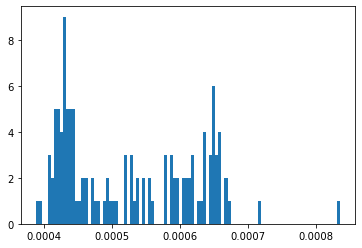

In [142]:
_=plt.hist(df.median(axis=1), bins = 100)

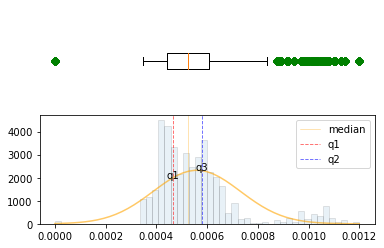

In [173]:
from scipy.stats import norm
import matplotlib.pyplot as plt
n_bins =50
sigma = np.std(s)
mu = np.mean(s)
median = np.median(s)
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
n, bins, patches = axes[1].hist(s, n_bins, density=True, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

q1, q3 = np.quantile(s, 0.33), np.quantile(s, 0.66)
median = np.median(s)
# print(q1, median, q3)

#probability density function
_=axes[0].boxplot(s, 0, 'gD', vert=False)
_=axes[1].axvline(median, color='orange', alpha=.6, linewidth=.5, label='median')

_=axes[1].axvline(q1, color='red', alpha=.6, linewidth=.9, linestyle='--', label='q1')
_=axes[1].annotate('q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center',label='q1')
_=axes[1].annotate('q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center',label='q3')
_=axes[1].axvline(q3, color='blue', alpha=.6, linewidth=.9, linestyle='--',  label='q2')
_=axes[1].plot(bins, pdf, color='orange', alpha=.6)
_=axes[0].axis('off')
_=plt.legend()

_=plt.subplots_adjust(hspace=0)
_=plt.show()